# Functions used but not output to slides... 

>*"It always bothers me that according to the laws as we understand them today, it takes a computing machine an infinite number of logical operations to figure out what goes on in no matter how tiny a region of space, and no matter how tiny a region of time. How can all that be going on in that tiny space? Why should it take an infinite amount of logic to figure out what one tiny piece of space/time is going to do? So I have often made the hypothesis ultimately physics will not require a mathematical statement, that in the end the machinery will be revealed and the laws will turn out to be simple, like the chequer board with all its apparent complexities. But this is just speculation."* - Richard Feynman. (The Character of Physical Law - Ch. 2)
<!-- The currently accepted theories all assume some sort of spacetime continuum or otherwise continuously defined objects. Of course, a computer 'thinks' in terms of bits, and therefore does not deal with continuum variables or any other continuous objects. It therefore needs to 'chop things up', i.e. discretize. -->

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def wolfram_ca(rule, num_steps, initial_state):
    """Generate a Wolfram cellular automaton.
    
    INPUTS:
        rule (int): Rule number for the cellular automaton.
        num_steps (int): Number of steps or generations for the automaton.
        initial_state (ndarray): Initial state of the automaton as a 1D array.

    OUTPUTS:
        ndarray: Array representing the cellular automaton with shape (num_steps, num_cells).
    """
    num_cells = len(initial_state)
    automaton = np.zeros((num_steps, num_cells), dtype=np.uint8)
    automaton[0] = initial_state

    # Convert rule to binary representation and ensure it is represented as an 8-bit string
    binary_rule = bin(rule)[2:].zfill(8)

    # Apply rule to generate new states
    for step in range(1, num_steps):
        for i in range(num_cells):
            # Determine the neighborhood states
            left = automaton[step - 1, (i - 1) % num_cells] #here the modulo operator % ensures that the indices wrap around to the opposite end of the automaton if they exceed the range of valid indices. 
            center = automaton[step - 1, i]
            right = automaton[step - 1, (i + 1) % num_cells]
            # Convert neighborhood states to an integer between 0 and 7
            neighborhood = 7 - (left << 2 | center << 1 | right)
            # Apply the rule to determine the new state of the cell
            automaton[step, i] = int(binary_rule[neighborhood])

    return automaton

def plot_ca(automaton):
    """Plot the cellular automaton.
    
    INPUTS: 
        automaton (ndarray): Array representing the cellular automaton.

    OUTPUTS: 
        None
    """
    num_steps, num_cells = automaton.shape
    plt.figure(figsize=(10, 6))
    plt.imshow(automaton, cmap='binary', aspect='auto')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Cell')
    plt.ylabel('Step')
    plt.title('Elementary cellular automaton')
    plt.show()


> *"You don't educate people by telling them useful things, you educate people by telling them interesting things"* - John Conway


We've see an example of continuous field models with PDEs that were coarse-grained for a discrete approximation

Spatio-temporal dynamics may also be appropriately modelled intentionally as a discrete dynamical system...

# Automaton (singular) Automata (plural)

<center>
<img src="a_single_lone_automata_style_of_Rafa_Olbinski.png" width="600">
</center>

(Style of Rafał Olbiński)

Automata are mathematical models of very simple machines that move between different **states** over time based on some **rules**

## State
Machines are fundamentally defined by their *state*

The state is finite and discrete (usually)

Automata are therefore often referred to as 'finite state automata'/'finite state machines' or simply 'cells'...

## Rules
Machines update their state using a *state-transition function*

State-transition functions update the state of something based on its current state and (usually) that of its neighbours

They are simple, local, deterministic rules for iterating an initial configuration of cells

They are often formed as "if-then" statements, which are inherently nonlinear. 
<!-- No Superposition Principle: In linear systems, the principle of superposition holds, meaning the combined effect of two inputs is simply the sum of their individual effects. In cellular automata, this principle doesn't apply because the combined effect of neighboring cells cannot generally be decomposed into a simple sum of individual effects. -->

# Cellular automata/automaton

Invented in 1940s by Stanislaw Ulam and John von Neumann, who were especially interested in logical requirements for machine self-replication 

<!-- von Neumann was interested in self-reporoduction in a biological context and Stanislaw Ulam suggested using a cell-based concept -->

In von Neumann's model (https://en.wikipedia.org/wiki/Von_Neumann_cellular_automaton):
- many identical automata/cells were arranged uniformly on a lattice
- cells interacted/exchanged information with their 4 neighbouring cells 
<!-- (hence, this being named the von Neumann neighbourhood) -->
- 29 possible states for each cell
- and many complicated rules for how a cell in one state would change to another

He did all of this (for at least a few iterations) with pen and paper! 

This highlights two key points: 
1. the simulations are extremely rudimentary 
2. yet highly complex behaviour can emerge. 

In general, cellular automata  (CA) are a spatially distributed dynamical system where both space and time are discrete

These worlds are built on a regular and homogenous spatial grid (D-dimensional lattice) with one automata residing at each lattice site

Simple and relatively straightforward to simulate

One of the most common modelling tools in Complex Systems
<!-- They've also been used extensively in areas such as hydrodynamics, growth and morphogenesis of living organisms, ecology, traffic jams, social and economic dynamics etc etc -->

We'll now look at the *typical* set up and whilst there are some conventions note that nothing is sacred when it comes to cellular automata.

## The world


We must define the space the automata live in

- Dimension, size and discretisation (squares, hexagons, ...)
- Initial conditions 
    - simple, random or domain specific (structured/patterned, depending on context)
    - may play a significant role in the evolution and resulting dynamics
- Boundary conditions
    - No boundaries - assume that the space is infinite.
    - Periodic boundaries - space is 'wrapped' around each spatial direction.  For example, a ring in $1D$, a torus in $2D$.
    - Cut-off boundaries - cells at the edges/boundaries don't have neighbours.
    - Fixed boundaries - cells at the edges have fixed states, i.e., they don't update.

## State 
Each automaton is a dynamical state variable with a finite number of states available

Often simply binary:
- 0, off, blank, white, dead, ... 
- 1, on, filled, back, alive, ...

These are sometimes called 'two-state cellular automata'
<!-- quiescent vs non-quiescent -->

The state of all the cells (the pattern produced) is the *configuration*

This state changes in time according to some rule

## Network 
Which cells can a given cell see? (and use to make decisions)

Same *local* neighbourhood template is used by all cells

The template is typically centred at the cell of interest for some radius and some notion of distance

The state of cells in the neighbourhood feeds into the state-transition function

### Distance
The geometry of the lattice means the usual (Euclidean) distance function or metric isn't sensible

The typical neighbourhood templates consider all cells within a distance $d$: 
- von Neumann (NESW) is an $L_1$ norm (aka manhattan/taxicab distance)
$$\color{white}{d_1=\sum_i|x_i|}$$
- Moore (includes corners) is an $L_{\infty}$ norm
 $$d_{\infty}=\max_i|x_i|$$
<!-- - more exotic options can also be considered, e.g. in general we could consider the adjacent vertices of a vertex to be the neighbourhood if we operated the CA on a complex network.
 -->

## Update rule
State-transition function provides the dynamics (defines the physics)

Can be described lookup table, algorithm, mathematical formula, ...
<!-- $$s_{t+1}=F\big(s_t(x+x_0),s_t(x+x_1), \ldots , s_t(x+x_{n-1})\big)$$

where $s_{t+1}(x)$ is the state of the automaton located at $x$ at time $t$. $F$ is the state-transition function, $N=\{x_0,x_1,\ldots,x_{n-1}\}$ is the neighbourhood. 

 -->


\begin{equation*}
\color{white}{s_{t+1}(x) = F\left[s_{t}(x+x_{0}), s_{t}(x+x_{1}), \ldots, s_{t}(x+x_{n-1})\right],}
\end{equation*}
- $s_{t}(x)$ is the state of the automaton located at $x$ at time $t$,
- $F$ is the state-transition function, 
- and $N=\{x_{0}, x_{1}, \ldots, x_{n-1}\}$ is the neighbourhood.

Updating of all cells is usually synchronous in step with a universal clock.

We will now explore the two most (in)famous examples: 
1. Wolfram's Elementary Cellular Automata; and 
2. Conway's two-dimensional Game of Life.

# Wolfram's elementary CA
These are the simplest class of one-dimensional cellular automata 

Wolfram has studied them extensively! His tomb *'A new kind of science'* rubbed many people the wrong way and some of the reviews are far more entertaining than the book itself

Nevertheless, these CA are an important starting point for our studies

They weren't the first CA though, even Game of Life came before them

## The model

To create a model we will need to define:
- **World:** finite sequence of square automata arranged on a grid with periodic boundaries 
- **States:** each cell can be in one of two possible states 
- **Initialisation:** either a single black cell in the middle of a row of white cells, or a random state for all cells
- **Neighbourhood:** consists of the cell itself and the cells to the left and right of it
- **Update rule:** Rule $X$, where $X \in \{0,1,2,\ldots , 2^8-1\}$.

### A unique numerical code for each possible rule set

There are 8 possible neighbourhood configurations: $000$ $001$ $010$ $011$ $100$ $101$ $110$ $111$

The particular rule is named based on the update for each of these 8 configurations (in order) 

For example, this is Rule 50:
<center>
<img src="Rule50.png" width="400">
</center>

(Image source: https://mathworld.wolfram.com/Rule50.html)


Interpretting the outputs of each of the possible combinations as a single integer in base 2 where white is $0$ and black is $1$ i.e. $00110010$ is binary for 50 

Wolfram explored every possible set of rules in great detail

##### An aside: Do you know binary?

Base two system, i.e. there are only two digits: 0 and 1

Each digit's place value is a power of two

e.g. $00110010_2=50_{10}$ because $0\times 2^7 + 0\times 2^6 + 1\times 2^5 + 1\times 2^4 + \ldots +1\times 2^1 + 0\times 2^0 = 50_{10}$

Binary is efficient for computers as it aligns with the on/off states of electronic circuits


(Whereas the decimal system is a base ten system with digits: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9. And each digit's place value is a power of ten e.g. $50_{10}=5 \times 10^1 + 0\times 10^0$)

### Observing the dynamics
There is one more question we need to answer: how should we visualise the evolution?

The most straightforward solution, given that we are working with one-dimensional data, is to include a separate axis for time

This is a space-time diagram. Each row of depicts the cells of the automaton for a particular time, with time increasing downwards.

So what kinds of patterns do these rules produce?: https://www.complexity-explorables.org/explorables/kelp/

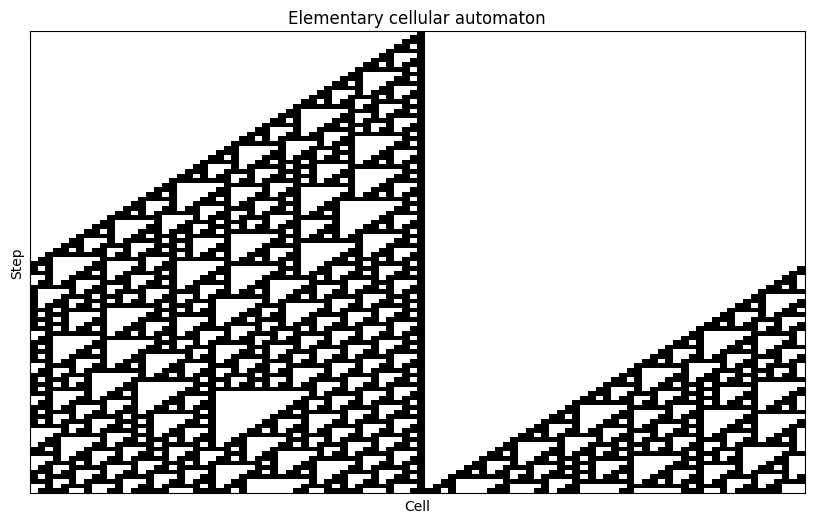

In [11]:
rule_number = 110
steps = 100
L = 100 
initial_state = np.zeros(L, dtype=np.uint8) 
initial_state[L//2] = 1

# initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton)

##### Sierpiński triangle
Rule 90

Each cell's state-transition function is the exclusive or of its two neighbours

Because this is equivalent to modulo-2 addition, this generates the modulo-2 version of Pascal's triangle
<!-- The diagram has a 1 wherever Pascal's triangle has an odd number, and a 0 wherever Pascal's triangle has an even number. -->

From a single cell Rules 18, 22, 26, 82, 146, 154, 210 and 218 also generate the Sierpiński triangle

CA like this are sometimes referred to as replicators because the patterns are making copies of themselves

##### An aside: Do you know modulo arithmetic?
Numbers "wrap around" at the modulus 

Often compared to the way hours wrap around on a clock (modulus $m=12$), days wrap around the week (modulus $m=7$) etc

- The operation is written as $a \text{ mod } m$, where:
  - $a$ is the number you're working with.
  - $m$ is the modulus.
  - the result is the remainder when $a$ is divided by $m$

- $17 \text{ mod } 5 $ means you divide 17 by 5, which gives 3 with a remainder of 2. So, $17 \text{ mod } 5 = 2 $
- $25 \text{ mod } 7 $ means you divide 25 by 7, which gives 3 with a remainder of 4. So, $25 \text{ mod } 7 = 4 $

# Game of Life

Conway's Game of Life is one of the most well-known cellular automata

Explored on a Go board in the mathematics department's tea room at Cambridge 
<!-- Different because Go buttons are put at grid vertices -->

Not the first but is arguably the best example of CA 

Popularised in columns by Martin Gardener in Scientific American

Pause for a moment to think about how all of the elements of our one-dimensional cellular automata might work in the context of a two-dimensional cellular automata... 


To create a model we will need to define:
- World;
- States;
- Initialisation;
- Neighbourhood;
- Rules for updating;
- and a means to visualise the evolution. 

## The model

- **World:** 2D, square grid (i.e. a square lattice), period boundaries
- **States:** binary
- **Initialisation:** random
- **Neighbourhood:** Moore neighbourhood (the 8 surrounding squares and self)
- **Rules:** ???
- **Visualisation:** To properly visualise the evolution of cells and any emergent patterns patterns we'll need something more than an additional axis for time. In particular, we want an animation.

##### State-transition rules
The Wolfram-equivalent two-dimensional cellular automata would have $2^{2^9}=262,144$ state-transition rules to define

Obviously that's way too many to list them out explicitly

Simplification is often achieved via:
- Rotational symmetry (common if modelling physical phenomena)
- *Totalistic* rules where the state-transition function depends only on the sum of the states 
<!-- (these are of course always rotationally symmetric) -->

Conway simplified things to be based (loosely) on real cell growth with the birth and death depending on population density

**Rules:**
- A cell can be alive or dead
- Loneliness: alive cells (black) with fewer than 2 alive neighbours will die (turn white)
- Overcrowding: alive cells with more than 3 alive neighbours will die
- Happiness: alive cells with either 2 or 3 alive neighbours will continue living (stay black)
- Reproduction: dead cells with exactly 3 alive neighbours will come alive
- Dead cells stay dead.

### (Game of) Life is full of surprises!

This very simple 'game' shows dynamic almost life-like behaviours, which are highly non-trivial and fascinating

Even though the simulation is very simple and completely determined, there is fundamentally no way to predict what will happen, other than running a specific simulation to find out. 

No predictive shortcuts - referred to as *irreducible computability*
 
Typically, we will see one of three things occur:
1. The cells die out or become stagnant and the simulation effectively ends
2. The cells form into interesting small and stable structures that flip between two (or more) states
3. The cells seem to come alive and start doing unusual things

##### 1. The cells die out or become stagnant and the simulation effectively ends

**Still lifes**

e.g. the beehive: https://conwaylife.com/wiki/Beehive
<center>
<img src="Beehive.png" width="100">
</center>

##### 2. The cells form into interesting small and stable structures that flip between two (or more) states

**Oscillators**

e.g. the toad is a period 2 oscillator: https://conwaylife.com/wiki/Toad
<center>
<img src="Toad.png" width="200">
</center>

##### 3. The cells seem to come alive and start doing unusual things

**Spaceships** are moving oscillators that return to their starting position but shifted in space

e.g. the **glider** is the simplest type of spaceship and the first to be discovered. They are oscillators with period 4, which walk diagonally across the screen: https://conwaylife.com/wiki/Glider. 
<center>
<img src="Glider.png" width="400">
</center>

Remember: The squares don't actually 'move', but the pattern of black squares appears as though a glider is travelling across the background. Humans are very good at seeing patterns, sometimes we are too good at it  

Conway supposedly regrets calling them gliders as they are much more like 'walkers' or 'crawlers'

The glider now has fairly widespread use as the emblem for hackers: http://www.catb.org/hacker-emblem/

**Guns**

Have parts that repeat periodically, like an oscillator, but they also periodically emit spaceships

e.g. Gosper's glider gun (from Bill Gosper and a team at MIT), which produces recurrent streams of “organisms” spawned from digital “parents”
<img src="Gospers_glider_gun.gif" width="400" align="center">

(By Lucas Vieira - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=101736)

This object was discovered when Conway offered a \\$50 prize (equivalent to \\$380 in 2022) for anyone who could prove/disprove whether the Game of Life could support a pattern that could grow forever (he originally conjectured that no pattern can grow indefinitely)

It's discovery eventually led to the proof that Conway's Game of Life could function as a Turing machine.

##### An aside: Do you know what a Turing machine is?
Theoretical model of computation 

Introduced by Alan Turing in 1936

It provides a simple but powerful way to capture the fundamental principles of computation and algorithm


Consists of an infinite tape, a tape head, a finite set of states, and a set of rules (transition function)

The tape serves as both the input and the working memory, with the head reading and writing symbols one at a time

The way it works:
- The machine reads the symbol under the tape head
- looks up the corresponding rule based on its current state
- writes a new symbol to the tape (or leaves it as is)
- moves the tape head left or right; and
- transitions to a new state. 
- This process continues until the machine enters the halting state. What's left on the tape is the answer

<!-- A Turing machine operates sequentially (one step at a time), whereas a cellular automaton operates in parallel (all cells update simultaneously). -->

**Methuselas**

From most initial conditions the Game of Life quickly reaches a stable state where the number of live cells is nearly constant (possibly with some oscillation). 

Other patterns are so long-lived, they are called “Methuselahs”. (Methuselah, Noah's grandfather, had the longest lifespan of all those given in the Bible passing away at the grand old age of 969.) 
<!-- There are various explanations for such a long life: some believe a mistranslation, others believe that his age is used to give the impression that part of Genesis takes place in a very distant past.  -->

e.g. the r-pentomino is a Methuselah, which doesn't stabilise until generation 1103!: https://conwaylife.com/wiki/R-pentomino.
<center>
<img src="r_pentomino.png" width="100">
</center>

##### Enough talking, let's see the Game of Life in action

Explorable:
https://www.complexity-explorables.org/explorables/nah-dah-dah-nah-nah-opus-1984/

Large-scale patterns: 
https://www.youtube.com/watch?v=C2vgICfQawE

Clock:
https://www.youtube.com/watch?v=3NDAZ5g4EuU&t=13s
<!-- https://codegolf.stackexchange.com/questions/88783/build-a-digital-clock-in-conways-game-of-life -->

Sierpiński triangle: https://www.reddit.com/r/math/comments/fwujar/conways_game_of_life_forms_a_sierpiński_triangle/

Everything you could ever hope to know about the Game of Life: https://link.springer.com/content/pdf/10.1007/978-1-84996-217-9.pdf

Can you find an undiscovered emergent pattern like a glider gun or puffer train? 

Not easily... and that is not a coincidence

Conway chose the rules of Game of Life so that his conjecture (that no pattern can grow indefinitely) would not be obviously true or false

Of all possible rules for a 2D CA, most yield simple behaviour, i.e. most initial conditions stabilise quickly or grow unboundedly

By avoiding uninteresting CAs, Conway was also avoiding Wolfram’s Class 1 and Class 2 behaviour, and probably Class 3 as well (more on this in the next session)

If you do happen to stumble across or design something that is yet to be named additional marks are up for grabs! (And naming these patterns is something people take very seriously: Boojum, the Snark, and the Bandersnatch) 

# Extensions

- Cellular automata on networks
- Stochastic cellular automata - the state-transition function can be defined probablistically. For example, disease compartment changes state based on the probability of infection/recovery
- Multi-layer cellular automata - the cell state can be a vector not a scalar
- Asynchronous cellular automata - rather than all cells updating their states at once, cells can be chosen at random to update their state (cf. SIS voter model implementation)
- States can be oriented
- Can be combined with neural networks to guide the simulations towards desired outcomes. In recent years research in this area has been progressing, quickly with some astonishing results.

# CA in the real world

The second law of thermodynamics says that things should move from order to disorder

But life seems to contradict this, self-organising from very simple rules and producing highly complex evolution (a consequence of not operating in equilibrium regimes)

CA have been shown to directly correspond to processes generated by biological evolution

They capture and describe the transmission of information from one local node to another. Thus, any transmission problem, social or otherwise, can be modeled with a CA with appropriate transmission dynamics.

In [1]:
from IPython.display import YouTubeVideo
# YouTubeVideo("video_id_here", width=400)

#Example usage:
YouTubeVideo("iE46jKYcI4Y", width=1000) #video from here: https://www.youtube.com/watch?v=iE46jKYcI4Y


##### In 1D: Rule 30
>*"The Rule 30 automataon is the most surprising thing I've ever seen in science... It took me several years to absorb how important this was. But in the end, I realised that this one picture contains the clue to what's perhaps the most long-standing mystery in all of science: where, in the end, the complexity of the natural world comes from."* - Stephen Wolfram (Quoted in Forbes)

*Conus textile* (a venemous sea snail)
<center>
<img src="Textile_cone.jpg" width="200">
</center>

<!-- By Richard Ling - Own work; Location: Cod Hole, Great Barrier Reef, Australia, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=293495 -->


Wolfram patented this as a pseudo-random number generator
<!-- True random numbers are hardware generated or generated from blood volume pulse, atmospheric pressure, thermal noise, quantum phenomenon, etc. -->

And a few years ago put \\$30,000 up as a prize for answering some as yet unanswered questions: https://writings.stephenwolfram.com/2019/10/announcing-the-rule-30-prizes/

##### In 2D:
<center>
<img src="Lizard_CA.png" width="600">
</center>

There is a reaction-diffusion system underneath the cellular automata model

https://www.nature.com/articles/nature22031 


## In art

If you've never thought about knitting and maths in the same thought it's time to pick up a pair of knitting needles...

<center>
<img src="CA_Knitting.png" width="400">
</center>

Survey (includes fractals, chaos etc): 
https://link.springer.com/referenceworkentry/10.1007/978-3-319-70658-0_54-1
http://mtarchive.blogspot.com/2011/07/mathematical-knitting-network.html


# Next session
We'll see some of the methods available to actually analyse the outputs of a cellular automata

# Unused material


**Example CA---majority rule**

Voting 

The state of a cell can be a $0$ or a $1$.

The rule: A cell changes its state to the local majority of its neighbourhood

This CA model self-organises into separated patches of ones or zeros depending on the initial conditions.


Forrest fire: https://www.complexity-explorables.org/explorables/critically-inflammatory/
        
(epidemic spread)

contact process

Typically: fire seeded in single tree, if your neighbour is on fire you will catch fire, you will be completely charred in a single time step

state={tree, burning, charred/empty}=$\{0,1,2\}$ $
$0\rightarrow 1 \rightarrow 2 \rightarrow 0$

Eventual static state

What's a good metric? Do we measure static final state? Total area burned? What does it depend on? (density of trees p). Or perhaps the time it takes until the fire stops spreading (again a function of p)



# How do previous week's topics relate?

**Previous topics:**
- Why is this a complex system?
- What are the modelling choices that have been made?
- We can characterise the pattern of the CA model using dimension estimates.
- Are any of the patterns fractals?
- Does the 'complexity' of the pattern support Wolfram's categorisation? (this relates to information theory, which we may not have covered yet depending on how I decide to deliver things but you can return to this idea later if you have no idea what I'm talking about yet)
- Sierpinski triangle we saw for fractals can be produced with many patterns
- The Wolfram taxonomy can be applied to all the patterns we saw in reaction-diffusion systems

**Upcoming topics:**
- By applying a mean field approximation, the system’s state can be approximated just by one variable: the density

# For inclusion in 2024
https://theconversation.com/do-we-live-in-a-computer-simulation-like-in-the-matrix-my-proposed-new-law-of-physics-backs-up-the-idea-215552